# Machine Learning with Clustering

In [1]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#import new DF
anthro_df = pd.read_csv('../../team_aggregates.csv')
anthro_df = anthro_df.drop(columns=['FIRST_ANTHRO_ORDER', 'Unnamed: 0'])
anthro_df.head()

IID  min_qty  max_qty  median_qty  mean_qty  min_dollars  \
0  0100048IR0CC5G        1        4         2.0  2.166667        12.46   
1  010005D13BBMIY        1        5         2.0  2.125000        16.80   
2  010006AMGHWDXE        1        3         3.0  2.333333        55.17   
3  01000GRL4WQ6CF        1        3         1.5  1.666667         5.21   
4  01000JQK5K5I60        1        4         2.5  2.500000        55.96   

   max_dollars  median_dollars  mean_dollars  LIFETIME_APPAREL_DEMAND  ...  \
0       316.20         126.710    149.628333                  3018.32  ...   
1       219.72          58.070     66.070625                  2076.28  ...   
2       199.95         119.910    125.010000                   404.99  ...   
3       103.90          30.450     46.768333                   527.96  ...   
4       305.95         180.955    180.955000                   756.65  ...   

   ETHNIC_CODE_GROUP  LOYALTY_YN  states  Region  PERCENTAGE_ONLINE  \
0                 10           0       7       4           0.916667   
1                 10           0      33       1           0.562500   
2                 10           0      21       1           0.000000   
3                 10           0       6       4           0.500000   
4                  6           0       6       4           1.000000   

   PERCENTAGE_RETAIL  Days_diff_min  Days_diff_max  Days_diff_mean  \
0           0.083333              0            212       28.153846   
1           0.437500              0            333       29.764706   
2           1.000000              0            676      112.142857   
3           0.500000              0            213       55.800000   
4           0.000000              0             46        9.200000   

   Days_diff_median  
0               0.0  
1               0.0  
2               0.0  
3               5.0  
4               0.0  

[5 rows x 22 columns]

In [2]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(anthro_df[["states","Region", "ETHNIC_CODE_GROUP", "LOYALTY_YN"]])
anthro_df[["states","Region", "ETHNIC_CODE_GROUP", "LOYALTY_YN"]] = enc.transform(anthro_df[["states","Region", "ETHNIC_CODE_GROUP", "LOYALTY_YN"]])
anthro_df

IID  min_qty  max_qty  median_qty  mean_qty  min_dollars  \
0     0100048IR0CC5G        1        4         2.0  2.166667        12.46   
1     010005D13BBMIY        1        5         2.0  2.125000        16.80   
2     010006AMGHWDXE        1        3         3.0  2.333333        55.17   
3     01000GRL4WQ6CF        1        3         1.5  1.666667         5.21   
4     01000JQK5K5I60        1        4         2.5  2.500000        55.96   
...              ...      ...      ...         ...       ...          ...   
9003  0115TTWGO6XL73        3        5         4.0  4.000000        84.91   
9004  0115TUNZOOZXQ6        1        1         1.0  1.000000       120.00   
9005  0115TUPPGIM5Y5        1        3         1.0  1.285714         9.71   
9006  0115TY8B0FZETZ        1        1         1.0  1.000000        44.97   
9007  0115TZXTL34RJD        1        4         2.0  1.924528        61.60   

      max_dollars  median_dollars  mean_dollars  LIFETIME_APPAREL_DEMAND  ...  \
0          316.20         126.710    149.628333                  3018.32  ...   
1          219.72          58.070     66.070625                  2076.28  ...   
2          199.95         119.910    125.010000                   404.99  ...   
3          103.90          30.450     46.768333                   527.96  ...   
4          305.95         180.955    180.955000                   756.65  ...   
...           ...             ...           ...                      ...  ...   
9003       113.85          99.380     99.380000                   385.58  ...   
9004       120.00         120.000    120.000000                   835.00  ...   
9005       178.00          39.950     67.077143                  1584.70  ...   
9006        44.97          44.970     44.970000                  1642.97  ...   
9007       434.00         188.800    209.422830                 15558.18  ...   

      ETHNIC_CODE_GROUP  LOYALTY_YN  states  Region  PERCENTAGE_ONLINE  \
0                  10.0         0.0     7.0     4.0           0.916667   
1                  10.0         0.0    33.0     1.0           0.562500   
2                  10.0         0.0    21.0     1.0           0.000000   
3                  10.0         0.0     6.0     4.0           0.500000   
4                   6.0         0.0     6.0     4.0           1.000000   
...                 ...         ...     ...     ...                ...   
9003               10.0         0.0     6.0     4.0           0.500000   
9004               10.0         0.0    12.0     3.0           1.000000   
9005                4.0         0.0     6.0     4.0           0.142857   
9006                6.0         0.0    25.0     0.0           0.000000   
9007               10.0         0.0     6.0     4.0           0.339623   

      PERCENTAGE_RETAIL  Days_diff_min  Days_diff_max  Days_diff_mean  \
0              0.083333              0            212       28.153846   
1              0.437500              0            333       29.764706   
2              1.000000              0            676      112.142857   
3              0.500000              0            213       55.800000   
4              0.000000              0             46        9.200000   
...                 ...            ...            ...             ...   
9003           0.500000              0            181       22.625000   
9004           0.000000              0              0        0.000000   
9005           0.857143              0            289      109.555556   
9006           1.000000              0              0        0.000000   
9007           0.660377              0            144       10.568627   

      Days_diff_median  
0                  0.0  
1                  0.0  
2                  0.0  
3                  5.0  
4                  0.0  
...                ...  
9003               0.0  
9004               0.0  
9005              67.0  
9006               0.0  
9007               0.0  

[9008 rows x 22 columns]

In [3]:
#Threshold for outliers that are three standardiviations away from the mean
thres= 4196.702249 + 3*9749.040757

#Find the location are values less than the threshold
optimizing_df= anthro_df.loc[anthro_df['LIFETIME_APPAREL_DEMAND']<= thres]

In [4]:
# Create a new DataFrame that holds only the IID.
IID_df=optimizing_df['IID']
IID_df=pd.DataFrame(IID_df)
IID_df.head()

IID
0  0100048IR0CC5G
1  010005D13BBMIY
2  010006AMGHWDXE
3  01000GRL4WQ6CF
4  01000JQK5K5I60

In [5]:
optimizing_df = optimizing_df.drop(columns=["IID","Days_diff_min", "LOYALTY_YN","min_qty","median_qty"])
optimizing_df.head()

max_qty  mean_qty  min_dollars  max_dollars  median_dollars  mean_dollars  \
0        4  2.166667        12.46       316.20         126.710    149.628333   
1        5  2.125000        16.80       219.72          58.070     66.070625   
2        3  2.333333        55.17       199.95         119.910    125.010000   
3        3  1.666667         5.21       103.90          30.450     46.768333   
4        4  2.500000        55.96       305.95         180.955    180.955000   

   LIFETIME_APPAREL_DEMAND  AGE_  INCOME  ETHNIC_CODE_GROUP  states  Region  \
0                  3018.32    39      11               10.0     7.0     4.0   
1                  2076.28    47       6               10.0    33.0     1.0   
2                   404.99    33       6               10.0    21.0     1.0   
3                   527.96    42       6               10.0     6.0     4.0   
4                   756.65    50      11                6.0     6.0     4.0   

   PERCENTAGE_ONLINE  PERCENTAGE_RETAIL  Days_diff_max  Days_diff_mean  \
0           0.916667           0.083333            212       28.153846   
1           0.562500           0.437500            333       29.764706   
2           0.000000           1.000000            676      112.142857   
3           0.500000           0.500000            213       55.800000   
4           1.000000           0.000000             46        9.200000   

   Days_diff_median  
0               0.0  
1               0.0  
2               0.0  
3               5.0  
4               0.0

In [6]:
X=optimizing_df

In [7]:
# Standardize the data with StandardScaler().
X_scaled=StandardScaler().fit_transform(X)
X_scaled[0:5]

array([[ 0.02808604,  0.16448904, -0.59603779, -0.0349245 , -0.08209615,
        -0.04213744, -0.09618493, -0.52267386,  0.9077041 ,  0.55867029,
        -1.1549321 ,  1.12474694,  1.09850608, -1.09850608, -0.23557899,
        -0.38816097, -0.3037843 ],
       [ 0.34498073,  0.12565402, -0.54615662, -0.34164454, -0.69781766,
        -0.73574826, -0.28491509,  0.05703527, -0.7554723 ,  0.55867029,
         0.55731896, -0.90038977,  0.16666278, -0.16666278,  0.35478209,
        -0.36209708, -0.3037843 ],
       [-0.28880865,  0.31982911, -0.1051565 , -0.40449545, -0.1430942 ,
        -0.24649372, -0.61974464, -0.95745571, -0.7554723 ,  0.55867029,
        -0.23295076, -0.90038977, -1.31332365,  1.31332365,  2.02828498,
         0.97079085, -0.3037843 ],
       [-0.28880865, -0.30153119, -0.67936463, -0.70984848, -0.94557739,
        -0.89597619, -0.59510859, -0.30528294, -0.7554723 ,  0.55867029,
        -1.22078791,  1.12474694,  0.00221984, -0.00221984, -0.23069997,
         0.05915697

In [20]:
#Determine number of componentsUsing PCA to reduce dimension.
#Use option that allows you to set the variance of the input that is supposed to be explained by the generated components.
#Initialize PCA model, we want the explained variance to be between 95–99%.
pca = PCA(n_components=.95)

# Get principal components for the anthro data.
anthro_pca = pca.fit_transform(X_scaled)
anthro_pca

array([[ 0.27803841,  0.48402673, -1.22241931, ..., -0.06290322,
        -0.00921264, -0.29629074],
       [-0.65499724, -0.07370648, -0.46105724, ..., -0.80617088,
         0.10029119, -0.3911797 ],
       [-1.1211731 ,  0.0120766 ,  2.06820063, ..., -1.55811039,
         0.47140866,  0.86400261],
       ...,
       [-2.10894257, -0.37681154,  1.22465292, ...,  0.4059204 ,
         0.2617708 , -0.29211475],
       [-1.81087171, -2.42568587, -0.25674902, ...,  0.0065418 ,
         1.0408821 , -0.02793036],
       [ 1.22655013, -1.18285888,  0.29975629, ...,  0.85405449,
         0.37063807,  1.11560395]])

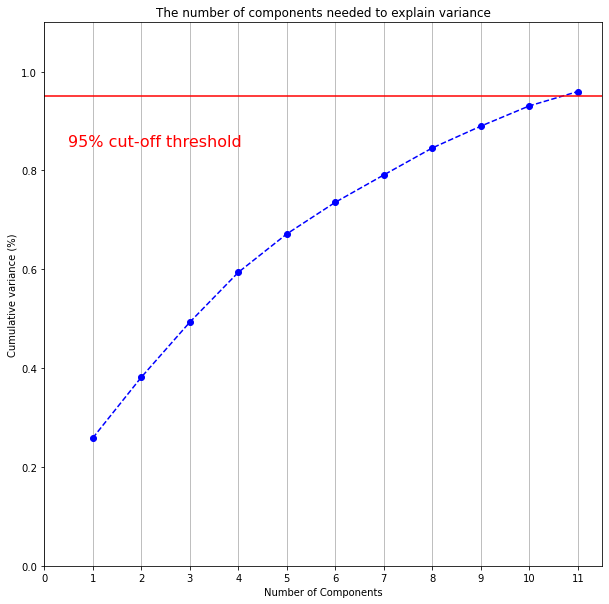

In [21]:
#plot the number of components vs 95% cut-off threshold

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (10,10)

fig, ax = plt.subplots()
xi = np.arange(1, 12, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 12, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()
#To get 95% of variance explained, you need 10-11 components

In [22]:
#Use the ideal number of components
pca = PCA(n_components=11)

# Get principal components for the anthro data.
anthro_pca = pca.fit_transform(X_scaled)
anthro_pca

array([[ 0.27803841,  0.48402673, -1.22241931, ..., -0.06290322,
        -0.00921264, -0.29629074],
       [-0.65499724, -0.07370648, -0.46105724, ..., -0.80617088,
         0.10029119, -0.3911797 ],
       [-1.1211731 ,  0.0120766 ,  2.06820063, ..., -1.55811039,
         0.47140866,  0.86400261],
       ...,
       [-2.10894257, -0.37681154,  1.22465292, ...,  0.4059204 ,
         0.2617708 , -0.29211475],
       [-1.81087171, -2.42568587, -0.25674902, ...,  0.0065418 ,
         1.0408821 , -0.02793036],
       [ 1.22655013, -1.18285888,  0.29975629, ...,  0.85405449,
         0.37063807,  1.11560395]])

In [23]:
#anthro IID might be needed later
#get the index values
index_values = (X.index.tolist())
index_values

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 1

In [25]:
# Create a DataFrame with principal components.
pcs_df = pd.DataFrame(
    data=anthro_pca, columns=["PC 1","PC 2","PC 3", "PC 4", "PC 5", "PC 6","PC 7",
    "PC 8","PC 9","PC 10", "PC 11"], index=index_values)
pcs_df.head()

PC 1      PC 2      PC 3      PC 4      PC 5      PC 6      PC 7  \
0  0.278038  0.484027 -1.222419 -0.748813  1.243808  0.591116 -0.882073   
1 -0.654997 -0.073706 -0.461057 -0.679216 -1.040707 -0.514776  0.774360   
2 -1.121173  0.012077  2.068201  0.614623 -0.559792 -1.194677  0.391806   
3 -1.543989 -0.509886 -0.476372 -0.405769  1.456983 -0.084747  0.565374   
4  0.889197  0.283349 -1.788635 -0.073635  1.710322  0.756399 -1.042224   

       PC 8      PC 9     PC 10     PC 11  
0 -1.343699 -0.062903 -0.009213 -0.296291  
1 -0.218386 -0.806171  0.100291 -0.391180  
2 -0.864349 -1.558110  0.471409  0.864003  
3 -1.119452 -0.315548  0.070582 -0.352792  
4 -0.028237 -0.091577 -0.067225 -0.951257

## Clustering Using K-Means
### Finding the Best Value for k Using the Elbow Curve

In [26]:
# Create an elbow curve to find the best value for K.
# Find the best value for K
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

In [27]:
# use elbow curve to decide amount of clusters
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
predictions

array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

In [28]:
# Create a new DataFrame including predicted clusters and anthro features.
# Concatentate the anthro_df and pcs_df DataFrames on the same columns.
clustered_df = anthro_df.join(pcs_df, how='inner')
clustered_df.head()

IID  min_qty  max_qty  median_qty  mean_qty  min_dollars  \
0  0100048IR0CC5G        1        4         2.0  2.166667        12.46   
1  010005D13BBMIY        1        5         2.0  2.125000        16.80   
2  010006AMGHWDXE        1        3         3.0  2.333333        55.17   
3  01000GRL4WQ6CF        1        3         1.5  1.666667         5.21   
4  01000JQK5K5I60        1        4         2.5  2.500000        55.96   

   max_dollars  median_dollars  mean_dollars  LIFETIME_APPAREL_DEMAND  ...  \
0       316.20         126.710    149.628333                  3018.32  ...   
1       219.72          58.070     66.070625                  2076.28  ...   
2       199.95         119.910    125.010000                   404.99  ...   
3       103.90          30.450     46.768333                   527.96  ...   
4       305.95         180.955    180.955000                   756.65  ...   

       PC 2      PC 3      PC 4      PC 5      PC 6      PC 7      PC 8  \
0  0.484027 -1.222419 -0.748813  1.243808  0.591116 -0.882073 -1.343699   
1 -0.073706 -0.461057 -0.679216 -1.040707 -0.514776  0.774360 -0.218386   
2  0.012077  2.068201  0.614623 -0.559792 -1.194677  0.391806 -0.864349   
3 -0.509886 -0.476372 -0.405769  1.456983 -0.084747  0.565374 -1.119452   
4  0.283349 -1.788635 -0.073635  1.710322  0.756399 -1.042224 -0.028237   

       PC 9     PC 10     PC 11  
0 -0.062903 -0.009213 -0.296291  
1 -0.806171  0.100291 -0.391180  
2 -1.558110  0.471409  0.864003  
3 -0.315548  0.070582 -0.352792  
4 -0.091577 -0.067225 -0.951257  

[5 rows x 33 columns]

In [36]:
#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["class"] = model.labels_
clustered_df.head()

IID  min_qty  max_qty  median_qty  mean_qty  min_dollars  \
0  0100048IR0CC5G        1        4         2.0  2.166667        12.46   
1  010005D13BBMIY        1        5         2.0  2.125000        16.80   
2  010006AMGHWDXE        1        3         3.0  2.333333        55.17   
3  01000GRL4WQ6CF        1        3         1.5  1.666667         5.21   
4  01000JQK5K5I60        1        4         2.5  2.500000        55.96   

   max_dollars  median_dollars  mean_dollars  LIFETIME_APPAREL_DEMAND  ...  \
0       316.20         126.710    149.628333                  3018.32  ...   
1       219.72          58.070     66.070625                  2076.28  ...   
2       199.95         119.910    125.010000                   404.99  ...   
3       103.90          30.450     46.768333                   527.96  ...   
4       305.95         180.955    180.955000                   756.65  ...   

       PC 3      PC 4      PC 5      PC 6      PC 7      PC 8      PC 9  \
0 -1.222419 -0.748813  1.243808  0.591116 -0.882073 -1.343699 -0.062903   
1 -0.461057 -0.679216 -1.040707 -0.514776  0.774360 -0.218386 -0.806171   
2  2.068201  0.614623 -0.559792 -1.194677  0.391806 -0.864349 -1.558110   
3 -0.476372 -0.405769  1.456983 -0.084747  0.565374 -1.119452 -0.315548   
4 -1.788635 -0.073635  1.710322  0.756399 -1.042224 -0.028237 -0.091577   

      PC 10     PC 11  class  
0 -0.009213 -0.296291      0  
1  0.100291 -0.391180      0  
2  0.471409  0.864003      1  
3  0.070582 -0.352792      1  
4 -0.067225 -0.951257      0  

[5 rows x 34 columns]

## Visualizing Cryptocurrencies Results
### 3D-Scatter with Clusters

In [42]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="class",
    symbol="class",
    hover_name="IID",
    hover_data=["AGE_", "INCOME", "Region"],
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

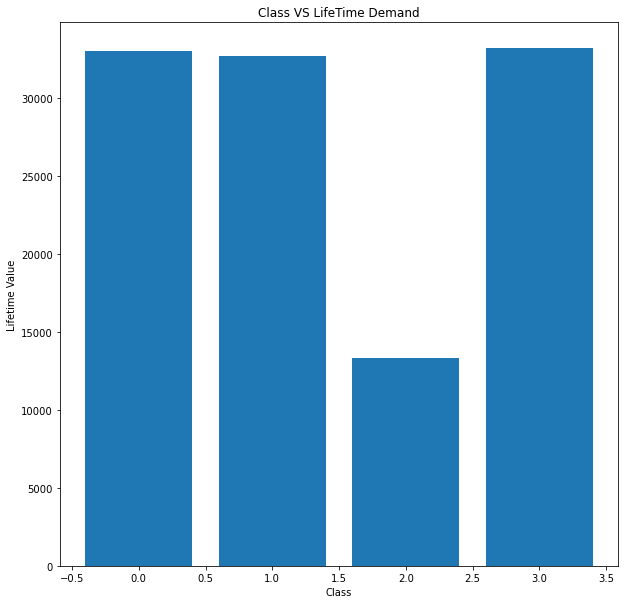

In [59]:
x = clustered_df['class']
y = clustered_df['LIFETIME_APPAREL_DEMAND']

plt.title("Class VS LifeTime Demand")
plt.xlabel('Class')
plt.ylabel('Lifetime Value')

plt.bar(x, y)

plt.show()